In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [2]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist", "class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

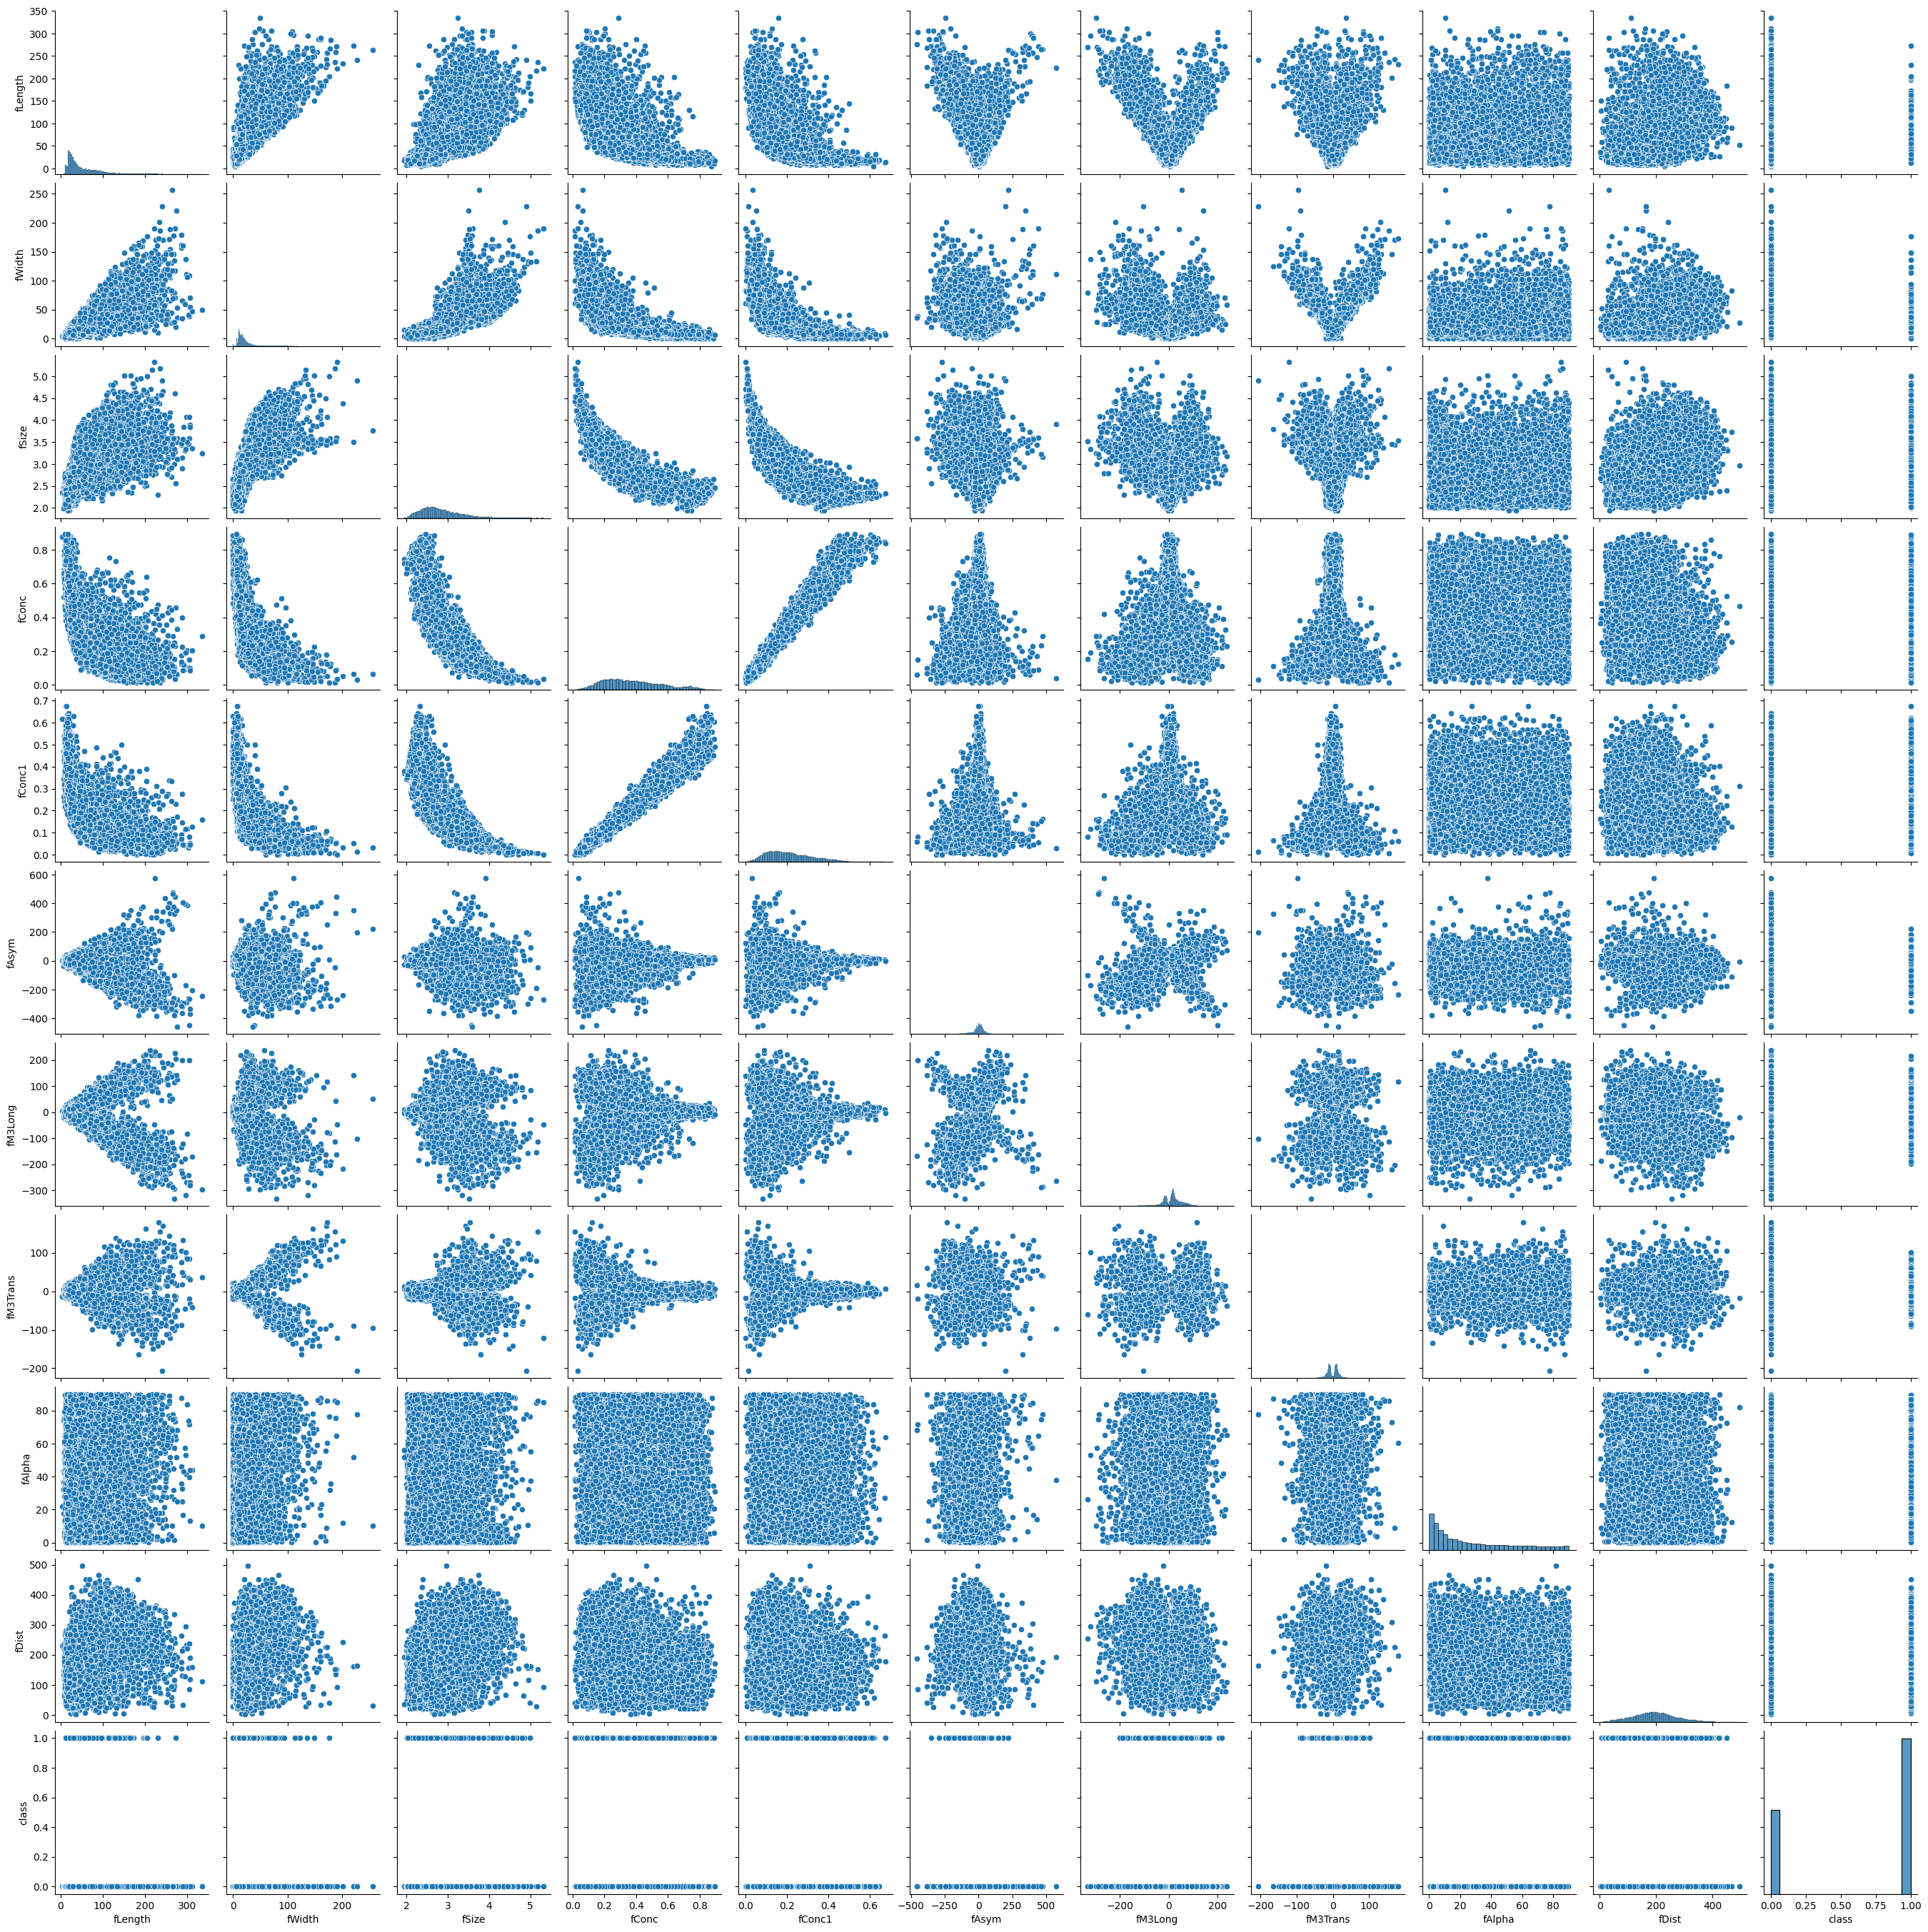

In [28]:
data = df.copy()
sns.pairplot(data=df)

In [3]:
df["class"]= (df["class"]=='g').astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

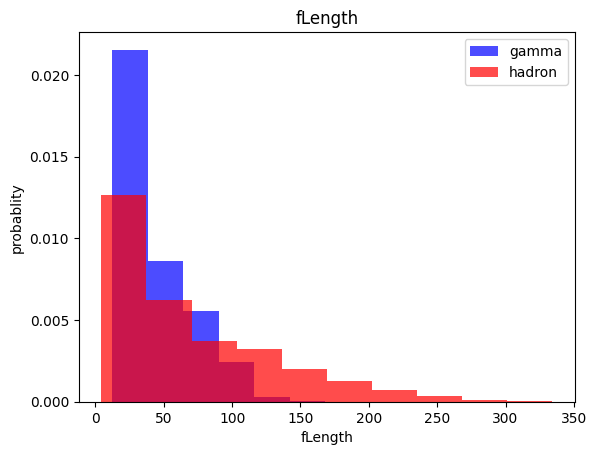

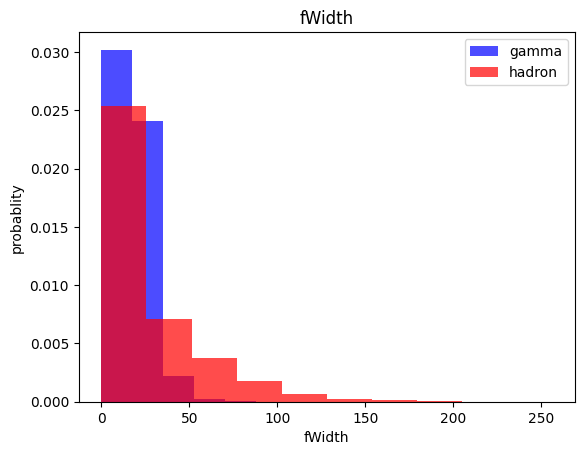

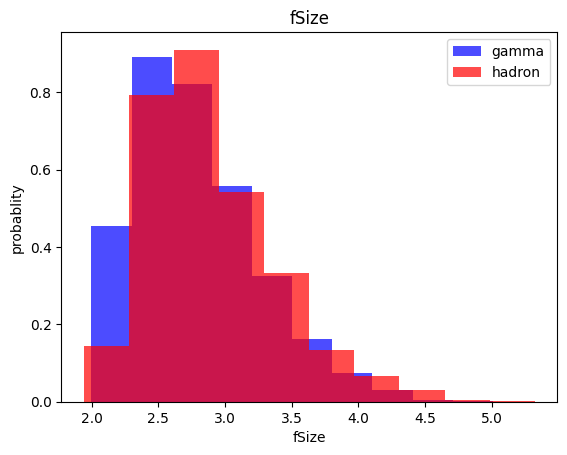

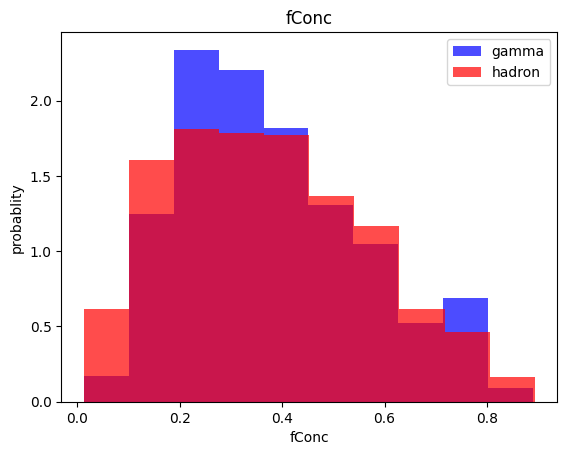

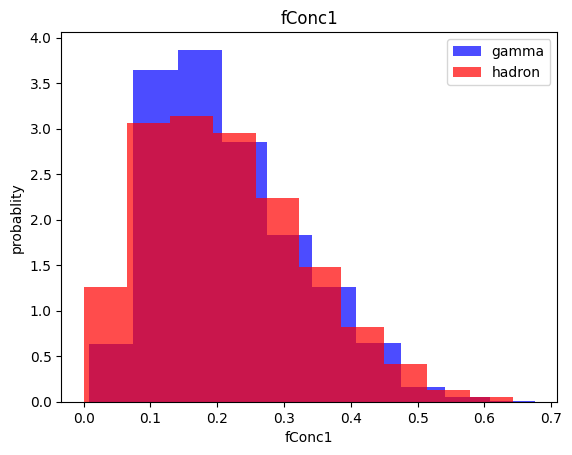

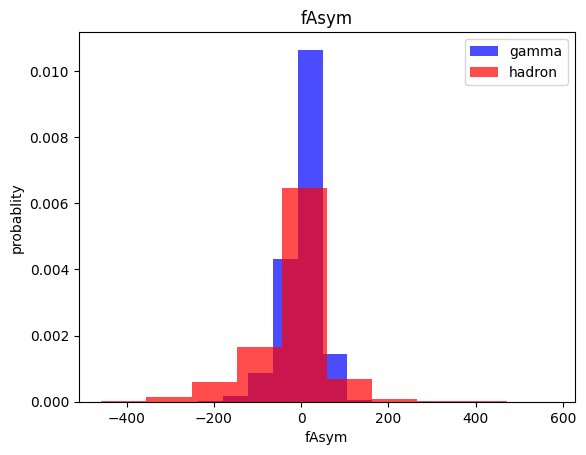

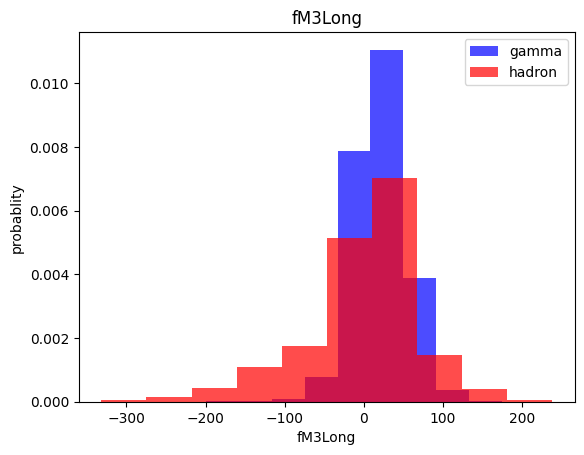

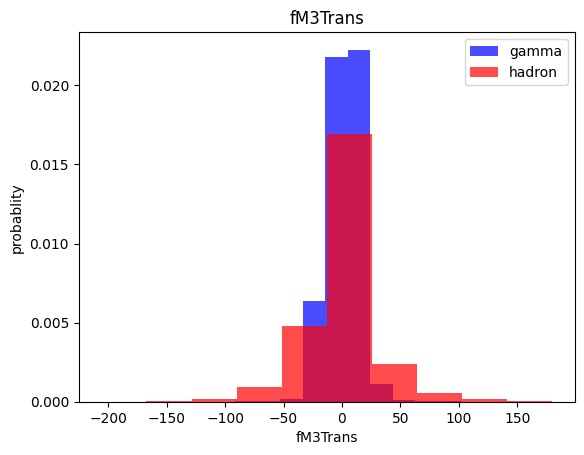

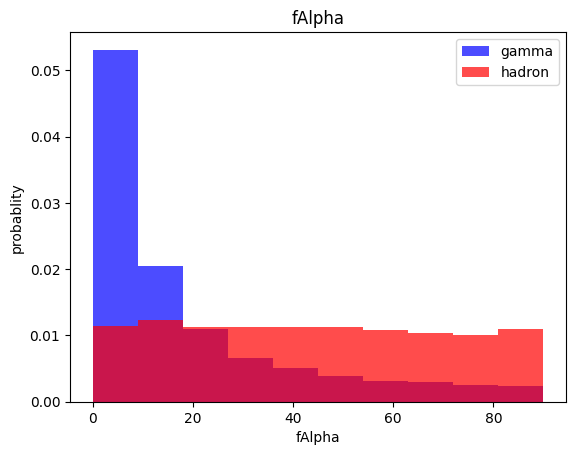

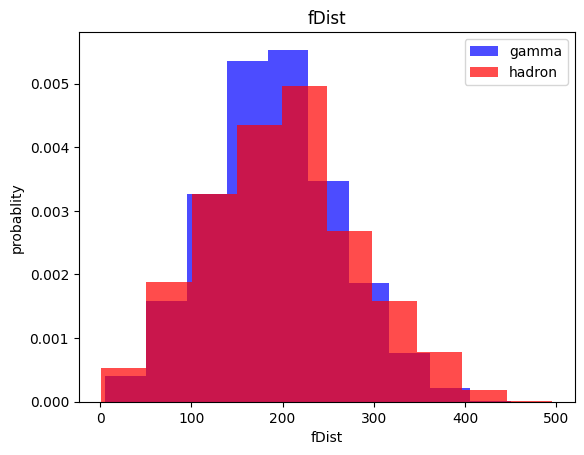

In [5]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [6]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x , y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y, (-1,1))))

  return data , x ,y

In [8]:
train,x_train,y_train = scale_dataset(train , oversample = True)
valid,x_valid,y_valid = scale_dataset(valid , oversample = False)
test,x_test,y_test = scale_dataset(test , oversample = False)

In [9]:
len(y_train)

14742

In [10]:
sum(y_train == 1)

7371

In [11]:
sum(y_train == 0)

7371

#KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = knn_model.predict(x_test)

In [15]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1306
           1       0.87      0.85      0.86      2498

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.81      0.82      3804



#Naive Bays

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [19]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1306
           1       0.74      0.90      0.81      2498

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



#Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [22]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1306
           1       0.85      0.82      0.84      2498

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#SVM


In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [25]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1306
           1       0.89      0.90      0.90      2498

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Net


In [26]:
import tensorflow as tf

In [29]:
def plot_history(history):
    fig , (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)


    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()

In [35]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes , activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
          ])
    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr) , loss='binary_crossentropy',
                     metrics=['accuracy']
                     )
    history = nn_model.fit(
        x_train,y_train,epochs=epochs, batch_size=batch_size, validation_split=0.2,verbose=1)

    return nn_model, history

16 nodes, dropout 0, lr0.01, batch size32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7867 - loss: 0.4542 - val_accuracy: 0.7759 - val_loss: 0.4350
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8476 - loss: 0.3573 - val_accuracy: 0.7230 - val_loss: 0.5101
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8540 - loss: 0.3439 - val_accuracy: 0.8006 - val_loss: 0.3836
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8607 - loss: 0.3282 - val_accuracy: 0.7304 - val_loss: 0.5302
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8590 - loss: 0.3336 - val_accuracy: 0.6996 - val_loss: 0.5869
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8679 - loss: 0.3133 - val_accuracy: 0.7175 - val_loss: 0.5292
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8638 - loss: 0.3190 - val_accuracy: 0.7477 - val_loss: 0.4581
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8611 - loss: 0.3210 - val_accu

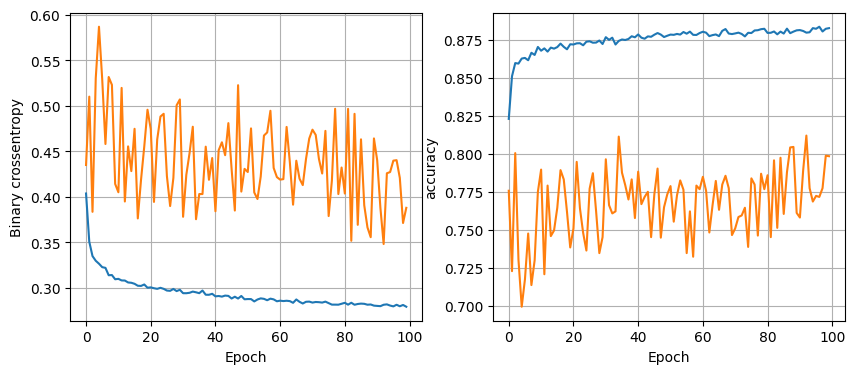

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8601 - loss: 0.3579
16 nodes, dropout 0, lr0.01, batch size64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7706 - loss: 0.4668 - val_accuracy: 0.7976 - val_loss: 0.4038
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8507 - loss: 0.3564 - val_accuracy: 0.6948 - val_loss: 0.5633
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.3380 - val_accuracy: 0.7419 - val_loss: 0.4803
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8634 - loss: 0.3210 - val_accuracy: 0.6894 - val_loss: 0.6301
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8581 - loss: 0.3285 - val_accuracy: 0.7464 - val_loss: 0.4856
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8660 - loss: 0.3144 - val_accuracy: 0.7531 - val_loss: 0.4641
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3127 - val_accuracy: 0.7660

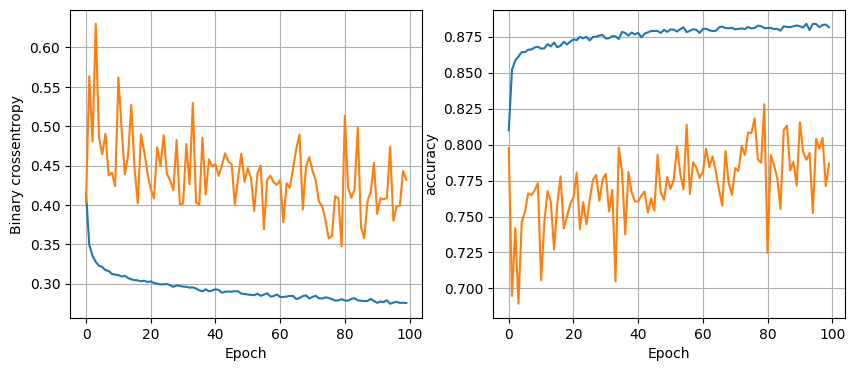

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.3689
16 nodes, dropout 0, lr0.01, batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7532 - loss: 0.5024 - val_accuracy: 0.7386 - val_loss: 0.4820
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8427 - loss: 0.3690 - val_accuracy: 0.6874 - val_loss: 0.5879
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3478 - val_accuracy: 0.7301 - val_loss: 0.5295
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.3374 - val_accuracy: 0.7057 - val_loss: 0.5496
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8597 - loss: 0.3278 - val_accuracy: 0.7131 - val_loss: 0.5468
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.3370 - val_accuracy: 0.7731 - val_loss: 0.4204
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.3263 - val_accuracy: 0.7440 - val_loss: 

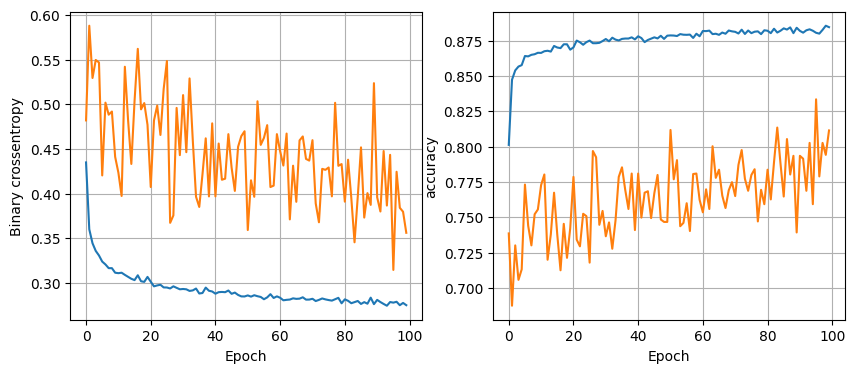

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3579
16 nodes, dropout 0, lr0.005, batch size32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7786 - loss: 0.4721 - val_accuracy: 0.7762 - val_loss: 0.4691
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8526 - loss: 0.3584 - val_accuracy: 0.7036 - val_loss: 0.5892
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8471 - loss: 0.3568 - val_accuracy: 0.7416 - val_loss: 0.4989
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3362 - val_accuracy: 0.7636 - val_loss: 0.4532
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.3321 - val_accuracy: 0.7545 - val_loss: 0.4630
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.3164 - val_accuracy: 0.7837 - val_loss: 0.3846
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8694 - loss: 0.3163 - val_accuracy: 0.765

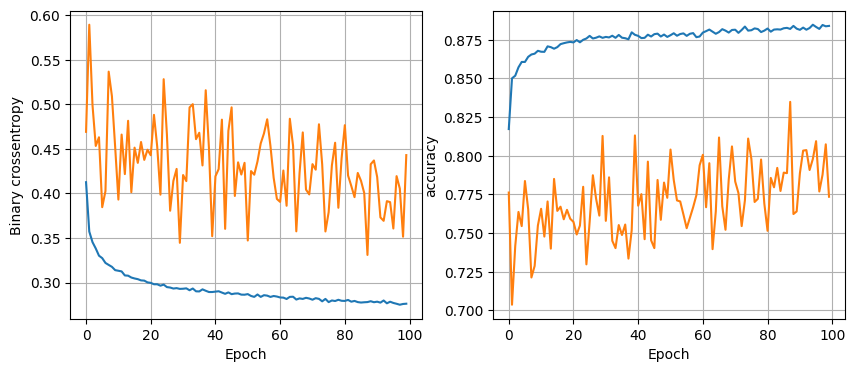

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8670 - loss: 0.3286
16 nodes, dropout 0, lr0.005, batch size64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7585 - loss: 0.5029 - val_accuracy: 0.6782 - val_loss: 0.6028
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8454 - loss: 0.3691 - val_accuracy: 0.7084 - val_loss: 0.5507
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.3504 - val_accuracy: 0.6890 - val_loss: 0.5964
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3419 - val_accuracy: 0.7080 - val_loss: 0.5343
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8596 - loss: 0.3319 - val_accuracy: 0.7084 - val_loss: 0.5404
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8598 - loss: 0.3269 - val_accuracy: 0.7396 - val_loss: 0.4834
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8659 - loss: 0.3170 - val_accuracy: 0.745

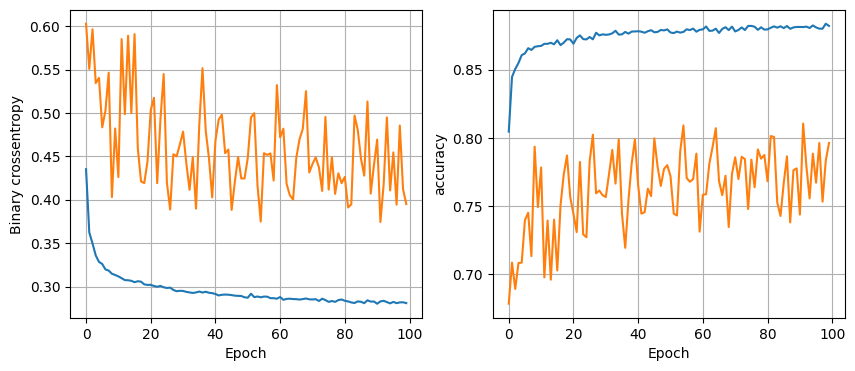

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3446
16 nodes, dropout 0, lr0.005, batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7691 - loss: 0.5073 - val_accuracy: 0.6341 - val_loss: 0.6362
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8307 - loss: 0.3839 - val_accuracy: 0.6904 - val_loss: 0.6174
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8455 - loss: 0.3664 - val_accuracy: 0.6901 - val_loss: 0.6046
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 0.3452 - val_accuracy: 0.7850 - val_loss: 0.4112
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.3298 - val_accuracy: 0.7759 - val_loss: 0.4261
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8640 - loss: 0.3282 - val_accuracy: 0.7348 - val_loss: 0.4933
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.3259 - val_accuracy: 0.7464 - val_loss:

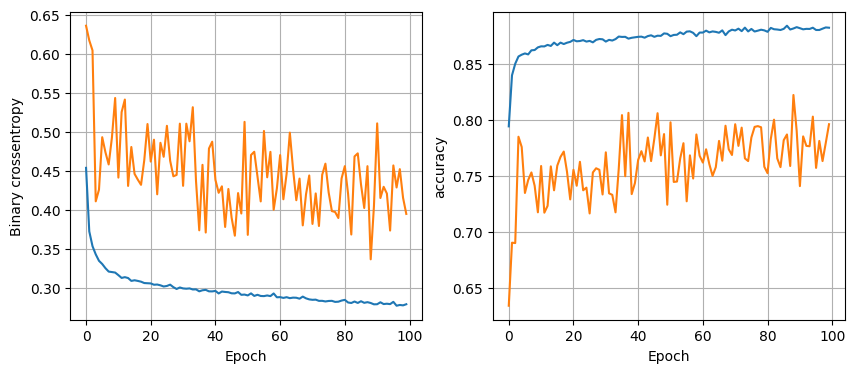

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8550 - loss: 0.3386
16 nodes, dropout 0, lr0.001, batch size32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6842 - loss: 0.5834 - val_accuracy: 0.6334 - val_loss: 0.5950
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8187 - loss: 0.4034 - val_accuracy: 0.7355 - val_loss: 0.5003
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8395 - loss: 0.3732 - val_accuracy: 0.7223 - val_loss: 0.5331
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8512 - loss: 0.3505 - val_accuracy: 0.7352 - val_loss: 0.5144
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3423 - val_accuracy: 0.7545 - val_loss: 0.4821
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3358 - val_accuracy: 0.7636 - val_loss: 0.4637
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8567 - loss: 0.3393 - val_accuracy: 0.706

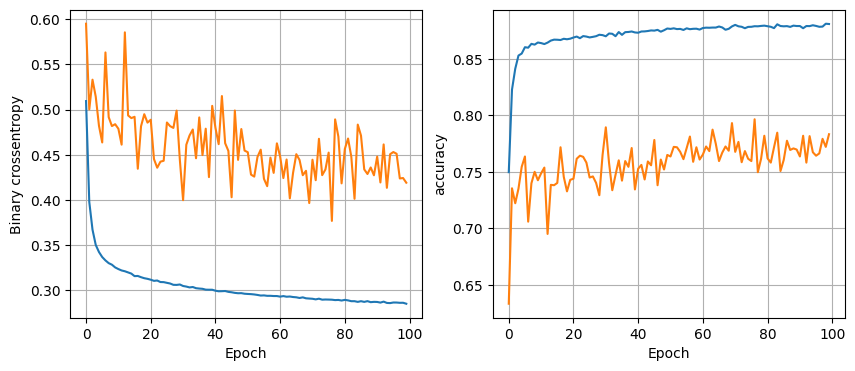

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8629 - loss: 0.3313
16 nodes, dropout 0, lr0.001, batch size64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6492 - loss: 0.6235 - val_accuracy: 0.5738 - val_loss: 0.6840
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4439 - val_accuracy: 0.6436 - val_loss: 0.6101
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8305 - loss: 0.3871 - val_accuracy: 0.6996 - val_loss: 0.5443
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8428 - loss: 0.3751 - val_accuracy: 0.7192 - val_loss: 0.5120
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8406 - loss: 0.3682 - val_accuracy: 0.6975 - val_loss: 0.5697
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8539 - loss: 0.3554 - val_accuracy: 0.7504 - val_loss: 0.4871
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8489 - loss: 0.3578 - val_accuracy: 0.729

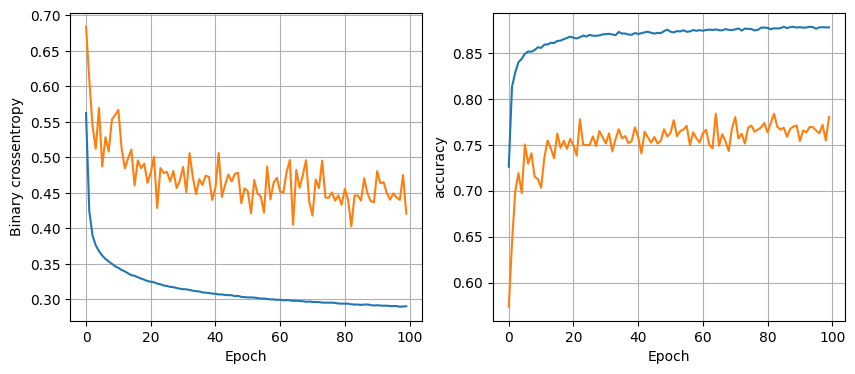

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.3290
16 nodes, dropout 0, lr0.001, batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5237 - loss: 0.6910 - val_accuracy: 0.4778 - val_loss: 0.7072
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7728 - loss: 0.4956 - val_accuracy: 0.6158 - val_loss: 0.6679
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8037 - loss: 0.4290 - val_accuracy: 0.6626 - val_loss: 0.6075
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8124 - loss: 0.4097 - val_accuracy: 0.6958 - val_loss: 0.5640
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 0.3819 - val_accuracy: 0.6840 - val_loss: 0.5851
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8315 - loss: 0.3800 - val_accuracy: 0.7155 - val_loss: 0.5287
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8442 - loss: 0.3620 - val_accuracy: 0.6989 - val_loss:

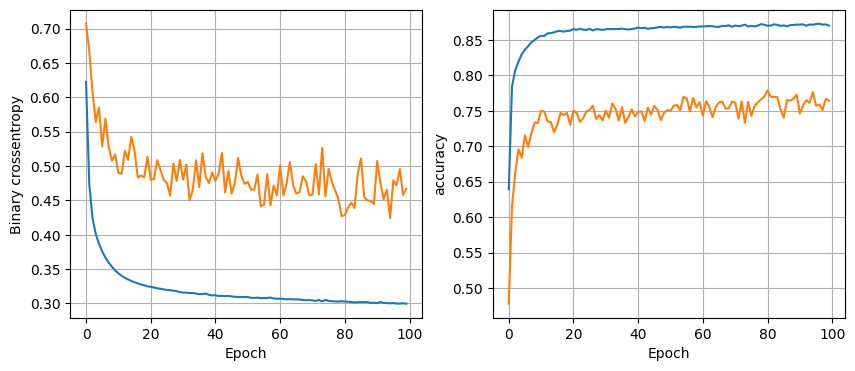

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8536 - loss: 0.3348
16 nodes, dropout 0.2, lr0.01, batch size32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7560 - loss: 0.4908 - val_accuracy: 0.5958 - val_loss: 0.6569
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8211 - loss: 0.4034 - val_accuracy: 0.7114 - val_loss: 0.5348
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8329 - loss: 0.3841 - val_accuracy: 0.6429 - val_loss: 0.6242
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.3682 - val_accuracy: 0.7226 - val_loss: 0.4605
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8456 - loss: 0.3616 - val_accuracy: 0.7087 - val_loss: 0.5203
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3528 - val_accuracy: 0.7321 - val_loss: 0.4963
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8478 - loss: 0.3554 - val_accuracy: 0.68

KeyboardInterrupt: 

In [36]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr{lr}, batch size{batch_size}")
                model, history = train_model(x_train,y_train,num_nodes, dropout_prob, lr, batch_size,epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid,y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    best_model = model

output runs till all the commands are executed till the 100th result